In [1]:
import re
import nltk
import warnings
import pandas as pd
import matplotlib.pyplot as plt

from string import punctuation
from tqdm.notebook import tqdm
from wordcloud import WordCloud

In [2]:
warnings.filterwarnings('ignore')
tqdm.pandas()
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andreychubin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/andreychubin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andreychubin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/andreychubin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andreychubin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [4]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
GROUPING_SPACE_REGEX = re.compile(r'([^\w]|[+])', re.UNICODE)

In [5]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }

    return tag_dict.get(tag, wordnet.NOUN)


def simple_word_tokenizer(text, _split=GROUPING_SPACE_REGEX.split):
    return [t for t in _split(text.lower()) if t and not t.isspace() and t not in punctuation and not t.isdigit()]


def token_r(text):
    words = simple_word_tokenizer(text)
    return ' '.join([lemmatizer.lemmatize(x, get_wordnet_pos(x)) for x in words if len(x)>2])


def draw_word_cloud(words: str, label: str, additional_stops: list = []) -> None:
    wordcloud = WordCloud(
        stopwords=stop_words + additional_stops,
        width = 800,
        height = 800,
        background_color='white',
        min_font_size = 10
    ).generate(words)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(label=label, fontsize=20, color="Black")
    plt.show()

In [6]:
data = pd.read_parquet('data/reviews_with_sentiment.pq')
data['processed_review'] = data.review.progress_apply(token_r)

  0%|          | 0/6300 [00:00<?, ?it/s]

## Telegram

In [7]:
telegram = ' '.join(data[data.app_name == 'telegram-messenger']['processed_review'].tolist())
telegram_pos = ' '.join(
    data[(data.app_name == 'telegram-messenger') & (data.sentiment == 'POSITIVE')]['processed_review'].tolist()
)
telegram_neg = ' '.join(
    data[(data.app_name == 'telegram-messenger') & (data.sentiment == 'NEGATIVE')]['processed_review'].tolist()
)

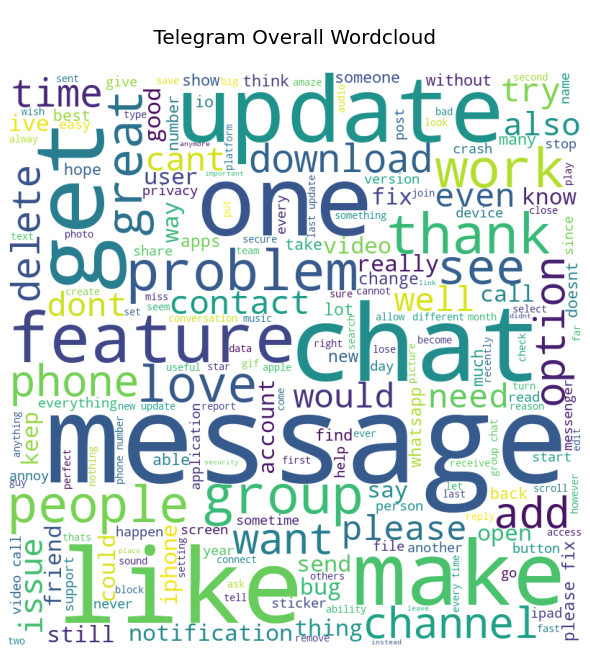

In [8]:
draw_word_cloud(telegram, '\n Telegram Overall Wordcloud \n', ['telegram', 'use', 'app'])

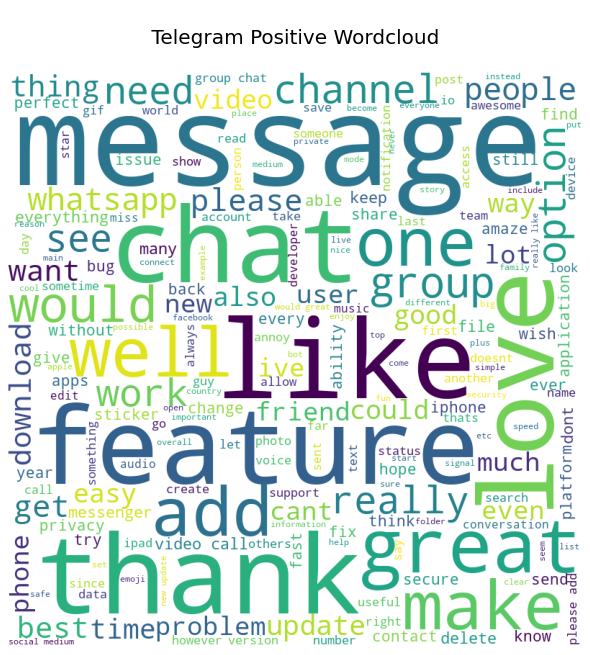

In [9]:
draw_word_cloud(telegram_pos, '\n Telegram Positive Wordcloud \n', ['telegram', 'use', 'app'])

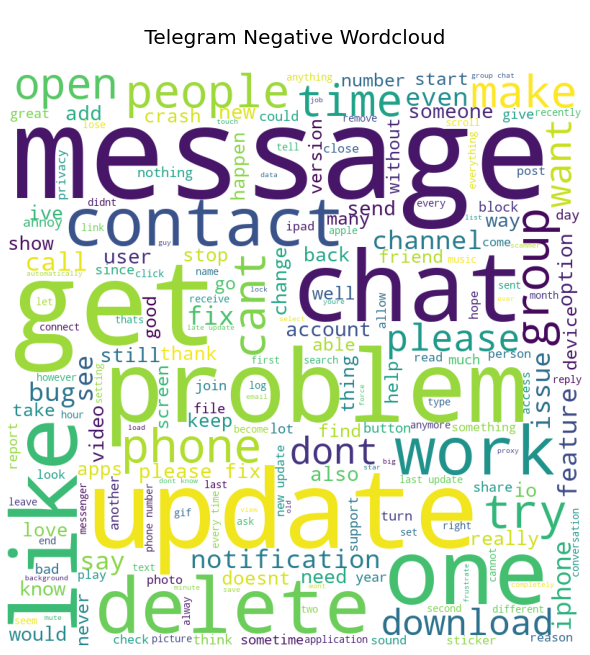

In [10]:
draw_word_cloud(telegram_neg, '\n Telegram Negative Wordcloud \n', ['telegram', 'use', 'app'])

## WhatsApp

In [11]:
whatsapp = ' '.join(data[data.app_name == 'whatsapp-messenger']['processed_review'].tolist())
whatsapp_pos = ' '.join(
    data[(data.app_name == 'whatsapp-messenger') & (data.sentiment == 'POSITIVE')]['processed_review'].tolist()
)
whatsapp_neg = ' '.join(
    data[(data.app_name == 'whatsapp-messenger') & (data.sentiment == 'NEGATIVE')]['processed_review'].tolist()
)

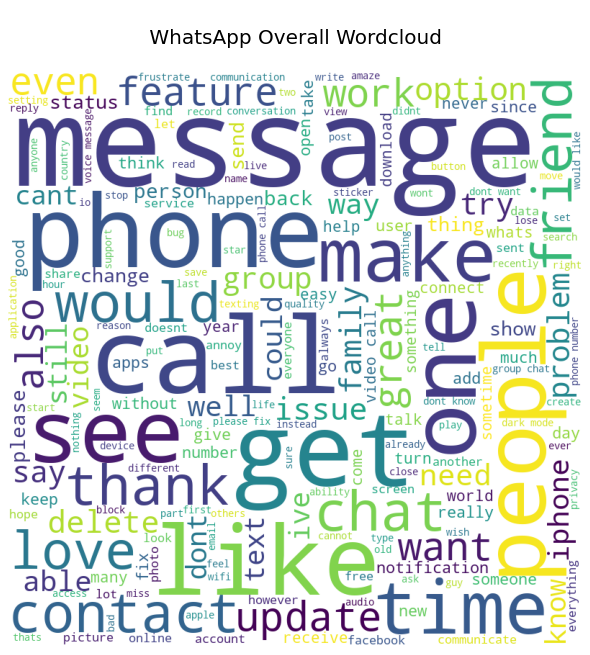

In [12]:
draw_word_cloud(whatsapp, '\n WhatsApp Overall Wordcloud \n', ['whatsapp', 'use', 'app'])

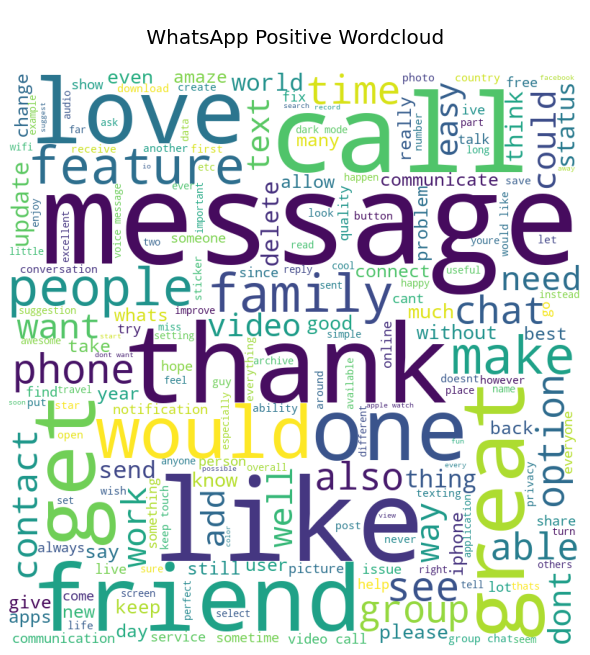

In [13]:
draw_word_cloud(whatsapp_pos, '\n WhatsApp Positive Wordcloud \n', ['whatsapp', 'use', 'app'])

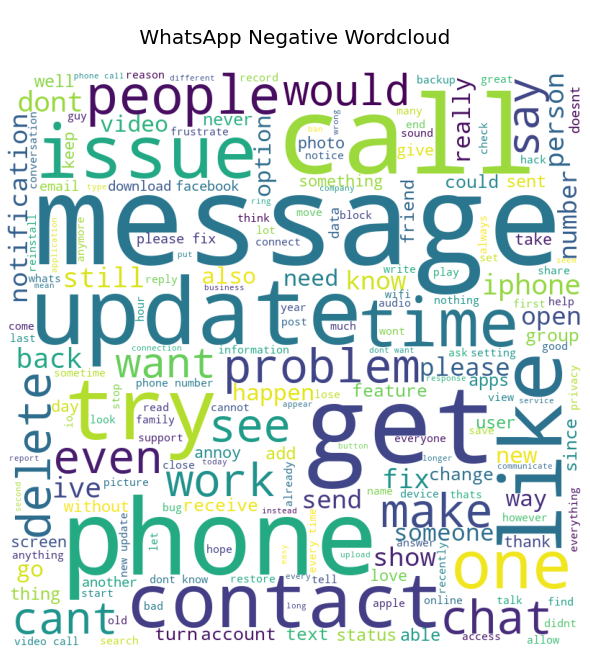

In [14]:
draw_word_cloud(whatsapp_neg, '\n WhatsApp Negative Wordcloud \n', ['whatsapp', 'use', 'app'])

## Messenger

In [15]:
messenger = ' '.join(data[data.app_name == 'facebook-messenger']['processed_review'].tolist())
messenger_pos = ' '.join(
    data[(data.app_name == 'facebook-messenger') & (data.sentiment == 'POSITIVE')]['processed_review'].tolist()
)
messenger_neg = ' '.join(
    data[(data.app_name == 'facebook-messenger') & (data.sentiment == 'NEGATIVE')]['processed_review'].tolist()
)

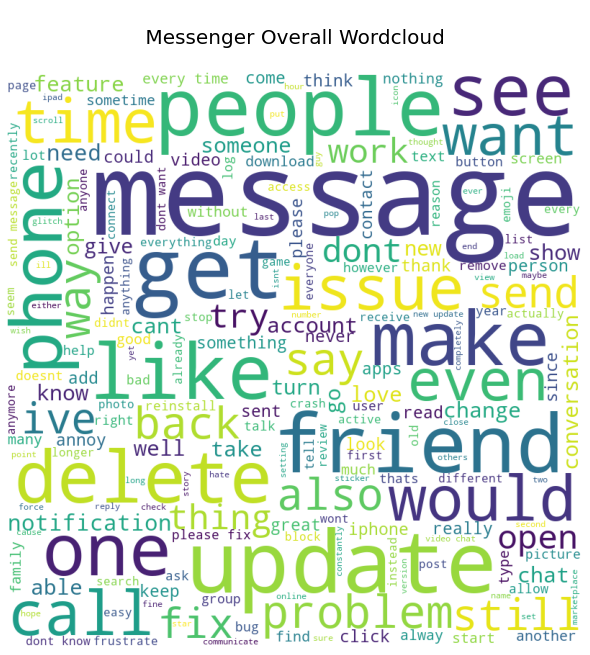

In [16]:
draw_word_cloud(messenger, '\n Messenger Overall Wordcloud \n', ['messenger', 'use', 'app', 'facebook'])

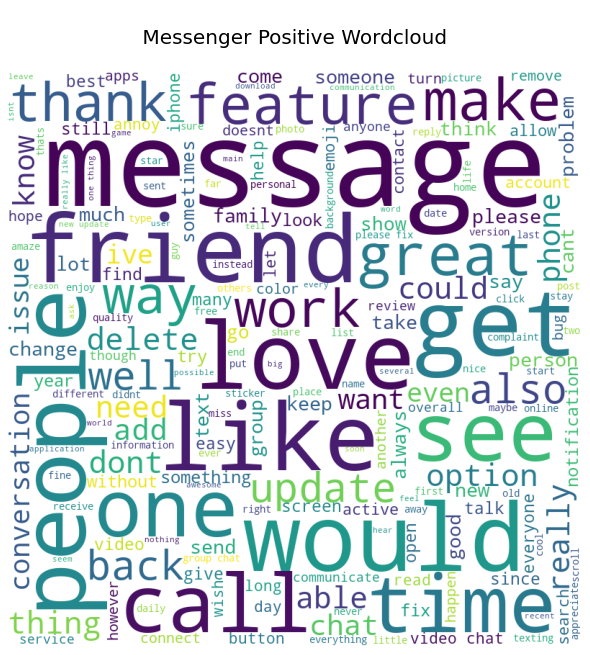

In [17]:
draw_word_cloud(messenger_pos, '\n Messenger Positive Wordcloud \n', ['messenger', 'use', 'app', 'facebook'])

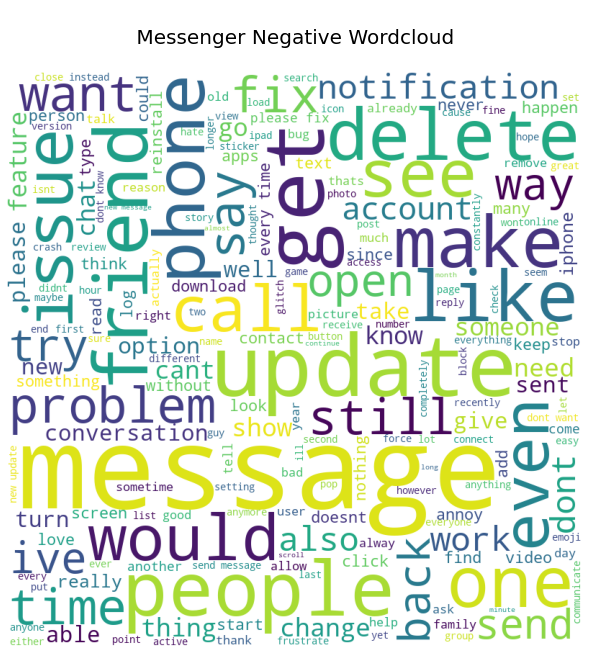

In [18]:
draw_word_cloud(messenger_neg, '\n Messenger Negative Wordcloud \n', ['messenger', 'use', 'app', 'facebook'])